[Scraping avec Python : Formation Complète 2024](https://www.youtube.com/watch?v=sOAZpHDEdkg)

Analyse la page d'accueil des livres - 00:43:00

Date : 17-02-24

In [9]:
import requests
from bs4 import BeautifulSoup
import pprint

In [5]:
url = 'https://books.toscrape.com/'

In [6]:
# Récupération des données de l'url
response = requests.get(url)

In [7]:
# Instanciation du contenu du texte de l'URL ci-avant 
soup = BeautifulSoup(response.text, 'html.parser')

### Récupération de tous les noms de catégorie figurant à gauche de la page @ :
- Travel
- Mystery
- ...

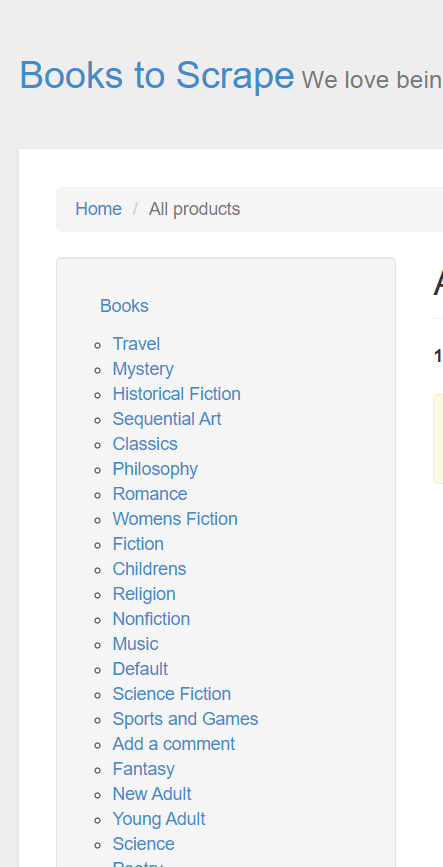

Pour cela, récupération à partir des données à partir de cette ligne : avec une recherche F, il n'y a qu'un seul 'nav-list'

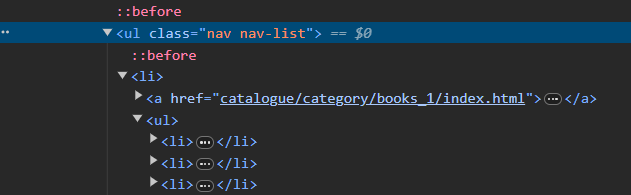

Mais par risque d'un changement de la page @ à l'avenir, il est préférable de récupérer les données selon l'ordre des priorités suivantes :
- à partir d'un ID car celui-ci ne change jamais sur une page @ : dans le site @ ciblé, il n'y a pas d'ID
- à partir d'un classe div : sélection faite ici sur le site @ ciblé

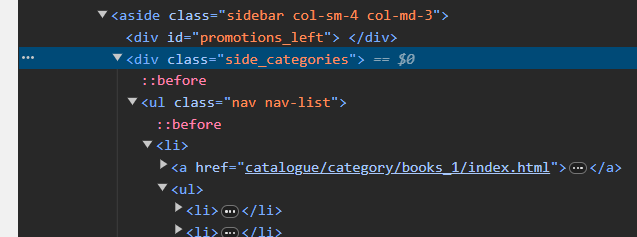

In [15]:
# Chercher sur le site @ ciblé le div qui a la classe "side_categories"
# instanciée dans une variable
aside = soup.find('div', class_="side_categories")
pprint.pprint(aside)

<div class="side_categories">
<ul class="nav nav-list">
<li>
<a href="catalogue/category/books_1/index.html">
                            
                                Books
                            
                        </a>
<ul>
<li>
<a href="catalogue/category/books/travel_2/index.html">
                            
                                Travel
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/mystery_3/index.html">
                            
                                Mystery
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/historical-fiction_4/index.html">
                            
                                Historical Fiction
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/sequential-art_5/index.html">
                            
                                Sequential Art
          

In [23]:
# Ciblage sur le "ul" de l'instruction ci-avant pour récupérer tous les
# "li" des catégories ciblées
categories = aside.find("ul").find("li").find("ul")
print(categories)

<ul>
<li>
<a href="catalogue/category/books/travel_2/index.html">
                            
                                Travel
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/mystery_3/index.html">
                            
                                Mystery
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/historical-fiction_4/index.html">
                            
                                Historical Fiction
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/sequential-art_5/index.html">
                            
                                Sequential Art
                            
                        </a>
</li>
<li>
<a href="catalogue/category/books/classics_6/index.html">
                            
                                Classics
                            
                   

In [26]:
# Récupération des catégories à partir d'une boucle
for categorie in categories.children:
    print(categorie.text)





                            
                                Travel
                            
                        





                            
                                Mystery
                            
                        





                            
                                Historical Fiction
                            
                        





                            
                                Sequential Art
                            
                        





                            
                                Classics
                            
                        





                            
                                Philosophy
                            
                        





                            
                                Romance
                            
                        





                            
                                Womens Fiction
   

In [27]:
# Récupération des catégories à partir de la boucle ci-avant 
# en supprimant les espaces
for categorie in categories.children:
    print(categorie.text.strip())


Travel

Mystery

Historical Fiction

Sequential Art

Classics

Philosophy

Romance

Womens Fiction

Fiction

Childrens

Religion

Nonfiction

Music

Default

Science Fiction

Sports and Games

Add a comment

Fantasy

New Adult

Young Adult

Science

Poetry

Paranormal

Art

Psychology

Autobiography

Parenting

Adult Fiction

Humor

Horror

History

Food and Drink

Christian Fiction

Business

Biography

Thriller

Contemporary

Spirituality

Academic

Self Help

Historical

Christian

Suspense

Short Stories

Novels

Health

Politics

Cultural

Erotica

Crime



In [28]:
# Contrôle sur les espaces présents entre chaque catégorie selon le script
# ci-avant : l'instruction None porte sur des balises non html (les balises
# "li" sont les noms des catégories)
for categorie in categories.children:
    print(categorie.name)

None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None
li
None


In [29]:
# Suppression des balises non html selon le résultat de l'instruction
# ci-avant
for category in categories.children:
    if category.name:
        print(category.text.strip())

Travel
Mystery
Historical Fiction
Sequential Art
Classics
Philosophy
Romance
Womens Fiction
Fiction
Childrens
Religion
Nonfiction
Music
Default
Science Fiction
Sports and Games
Add a comment
Fantasy
New Adult
Young Adult
Science
Poetry
Paranormal
Art
Psychology
Autobiography
Parenting
Adult Fiction
Humor
Horror
History
Food and Drink
Christian Fiction
Business
Biography
Thriller
Contemporary
Spirituality
Academic
Self Help
Historical
Christian
Suspense
Short Stories
Novels
Health
Politics
Cultural
Erotica
Crime


In [32]:
# Même instruction que ci-avant mais avec une comprehension de liste :    
categories_div = [
    category.text.strip() for category in categories.children if category.name]
categories_div

['Travel',
 'Mystery',
 'Historical Fiction',
 'Sequential Art',
 'Classics',
 'Philosophy',
 'Romance',
 'Womens Fiction',
 'Fiction',
 'Childrens',
 'Religion',
 'Nonfiction',
 'Music',
 'Default',
 'Science Fiction',
 'Sports and Games',
 'Add a comment',
 'Fantasy',
 'New Adult',
 'Young Adult',
 'Science',
 'Poetry',
 'Paranormal',
 'Art',
 'Psychology',
 'Autobiography',
 'Parenting',
 'Adult Fiction',
 'Humor',
 'Horror',
 'History',
 'Food and Drink',
 'Christian Fiction',
 'Business',
 'Biography',
 'Thriller',
 'Contemporary',
 'Spirituality',
 'Academic',
 'Self Help',
 'Historical',
 'Christian',
 'Suspense',
 'Short Stories',
 'Novels',
 'Health',
 'Politics',
 'Cultural',
 'Erotica',
 'Crime']

### Récupération des attributs sur les balises : images de la page @

Chaque image de la page @ ciblée a pour balise "img"

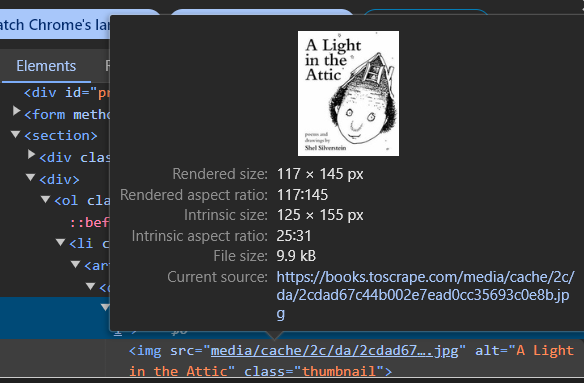

Par risque où évenntuellement la page @ serait modifiée avec l'insertion à titre d'exemple d'un logo, et donc par l'insertion d'une nouvelle balise "img", récupération de toutes les données comprises dans la balise "<section>"

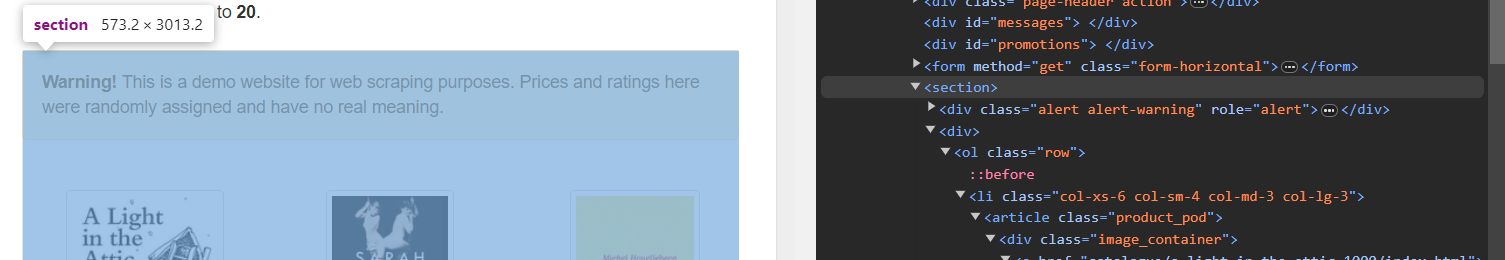

In [35]:
# Récupération de la balise unique 'section' et des balises "img"
images = soup.find("section").find_all("img")
images

[<img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/>,
 <img alt="Tipping the Velvet" class="thumbnail" src="media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg"/>,
 <img alt="Soumission" class="thumbnail" src="media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg"/>,
 <img alt="Sharp Objects" class="thumbnail" src="media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg"/>,
 <img alt="Sapiens: A Brief History of Humankind" class="thumbnail" src="media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg"/>,
 <img alt="The Requiem Red" class="thumbnail" src="media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg"/>,
 <img alt="The Dirty Little Secrets of Getting Your Dream Job" class="thumbnail" src="media/cache/92/27/92274a95b7c251fea59a2b8a78275ab4.jpg"/>,
 <img alt="The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull" class="thumbnail" src="media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78cc6

In [38]:
# Récupération des noms des fichiers.jpg avec la balise 'src' 
# dans une compréhension de liste
images_src = [image['src'] for image in images]
images_src
    

['media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg',
 'media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg',
 'media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg',
 'media/cache/32/51/3251cf3a3412f53f339e42cac2134093.jpg',
 'media/cache/be/a5/bea5697f2534a2f86a3ef27b5a8c12a6.jpg',
 'media/cache/68/33/68339b4c9bc034267e1da611ab3b34f8.jpg',
 'media/cache/92/27/92274a95b7c251fea59a2b8a78275ab4.jpg',
 'media/cache/3d/54/3d54940e57e662c4dd1f3ff00c78cc64.jpg',
 'media/cache/66/88/66883b91f6804b2323c8369331cb7dd1.jpg',
 'media/cache/58/46/5846057e28022268153beff6d352b06c.jpg',
 'media/cache/be/f4/bef44da28c98f905a3ebec0b87be8530.jpg',
 'media/cache/10/48/1048f63d3b5061cd2f424d20b3f9b666.jpg',
 'media/cache/5b/88/5b88c52633f53cacf162c15f4f823153.jpg',
 'media/cache/94/b1/94b1b8b244bce9677c2f29ccc890d4d2.jpg',
 'media/cache/81/c4/81c4a973364e17d01f217e1188253d5e.jpg',
 'media/cache/54/60/54607fe8945897cdcced0044103b10b6.jpg',
 'media/cache/55/33/553310a7162dfbc2c6d19a84da0df9e1.jpg